In [69]:
import pandas as pd,seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
data = pd.DataFrame({
    "A":[0,1,2,3,4,5],
    "B":[0,0,0,0,0,0],
    "C":[12,3,5,36,7,9],
    "D":[3,3,3,3,3,3]
})

In [6]:
data.head()

,A,B,C,D
0,0,0,12,3
1,1,0,3,3
2,2,0,5,3
3,3,0,36,3
4,4,0,7,3


## Feature Selection 1 - CONSTANT VARIABLES

In [3]:
from sklearn.feature_selection import VarianceThreshold

var_thres = VarianceThreshold(threshold=0).fit(data)

In [4]:
var_thres.get_support()

array([ True, False,  True, False])

So we can remove False ones because the variance is zero(no difference on variable value)

## Feature Selection 2 - HIGH COLLERATION

In [5]:
data = pd.read_csv('BostonHousing.csv').drop('lstat',axis=1)

In [6]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,36.2


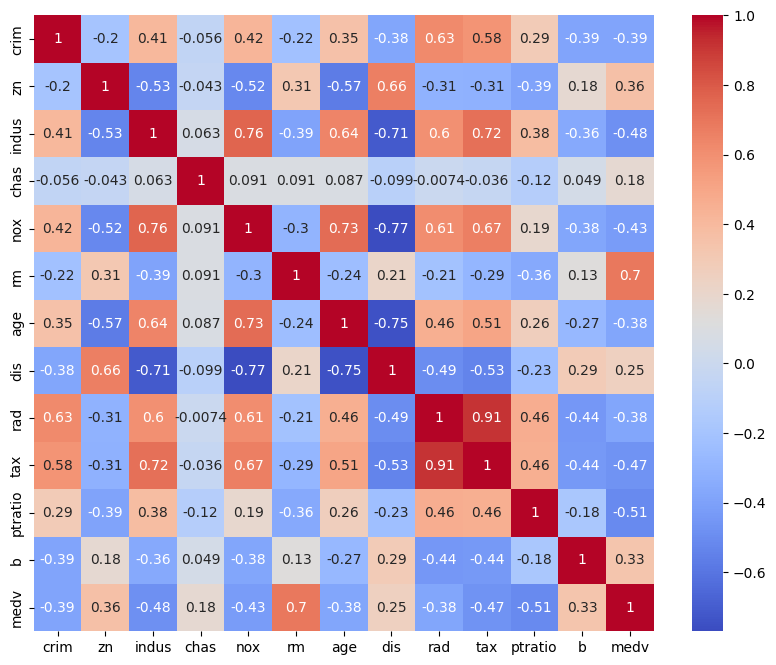

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.coolwarm)
plt.show()

In [12]:
#If I want to specify the threshold colleration to 0.7 :

def colleration(data,threshold):
    my_colleration_df = data.corr()
    variable_numbers = len(my_colleration_df)
    high_collerateds = dict()
    just_one=set()
    for i in range(variable_numbers):
        for j in range(variable_numbers):
            if(i != j and my_colleration_df.iloc[i,j]>threshold):
                high_collerateds["{} and {}".format(my_colleration_df.columns[i]
                                                    ,my_colleration_df.columns[j])]= my_colleration_df.iloc[i,j]
                just_one.add(my_colleration_df.columns[i])
                just_one.add(my_colleration_df.columns[j])
    return high_collerateds,just_one

In [14]:
high_correlated,just_one = colleration(data,0.7)
print(sorted(high_correlated,reverse=True))
print(just_one)

['tax and rad', 'tax and indus', 'rad and tax', 'nox and indus', 'nox and age', 'indus and tax', 'indus and nox', 'age and nox']
{'rad', 'indus', 'tax', 'nox', 'age'}


In [15]:
data.drop(['tax'],axis=1,inplace=True)

In [17]:
high_correlated,just_one = colleration(data,0.7)
sorted(high_correlated,reverse=True)

['nox and indus', 'nox and age', 'indus and nox', 'age and nox']

In [19]:
data.drop(['indus'],axis=1,inplace=True)

In [20]:
high_correlated,just_one = colleration(data,0.7)
sorted(high_correlated,reverse=True)

['nox and age', 'age and nox']

In [22]:
data.drop(['nox'],axis=1,inplace=True)

In [23]:
high_correlated,just_one = colleration(data,0.7)
sorted(high_correlated,reverse=True)

[]

## Feature Selection 3 - MUTUAL INFORMATION

In [47]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split

In [45]:
data = pd.read_csv('BostonHousing.csv') 

In [49]:
y = data.medv
X = data.drop("medv",axis=1)

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
mutual_info = mutual_info_regression(X,y)

In [86]:
mutualInfo_df = pd.DataFrame(data = mutual_info,columns=["mutualscore"])

In [87]:
mutualInfo_df.index = X.columns

In [94]:
mutualInfo_df.sort_values("mutualscore",ascending=False).T

,lstat,rm,indus,nox,ptratio,tax,crim,age,dis,rad,zn,b,chas
mutualscore,0.666241,0.528405,0.467006,0.461374,0.447577,0.363168,0.34443,0.309479,0.29918,0.216737,0.180401,0.170482,0.029502


## Feature Selection 4 -  Chi2

In [95]:
from sklearn.feature_selection import chi2,SelectKBest

In [114]:
ordered_feature = SelectKBest(score_func=chi2,k = 'all')

In [126]:
y_train = y_train.astype(int)

In [127]:
ordered_feature.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x12f1c1900>)

In [129]:
bests_df = pd.DataFrame(data = ordered_feature.scores_,columns=["chi2score"])

In [134]:
bests_df.index = x_train.columns
bests_df.sort_values("chi2score",ascending=False).T

,tax,zn,crim,b,age,rad,lstat,indus,dis,chas,ptratio,rm,nox
chi2score,12073.186603,5763.775211,4644.567979,3102.799412,1988.27166,1271.106279,1169.113288,810.477344,149.605494,59.99523,37.64385,18.293177,4.487489
